<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw02-2/hw02-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from requests import get

dates=['20180114','20200109']
stns=['47918','47909','47945']

for stn in stns:
  for date in dates:
    yr=date[0:4]
    mo=date[4:6]
    da=date[6:8]+'00'
    if stn=='47909' and date=='20200109':
      da=date[6:8]+'12'
    
    url='https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR='+yr\
            +'&MONTH='+mo+'&FROM='+da+'&TO='+da+'&STNM='+stn
    print(url)
  
    web=get(url,verify=False)
    a=web.text.splitlines()

    m=0
    with open(stn+'_'+date+'.txt','w') as f:
      for i in range(0,len(a)):
        if a[i][0:10]=='----------':
          m=1
        if a[i]=='</PRE><H3>Station information and sounding indices</H3><PRE>':
          m=0
        if m==1:
          #print(a[i])
          f.write(a[i]+'\n')

! rm -rf Machine-Learning-in-Atmospheric-Thermodynamics
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git 

https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47918


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0900&TO=0900&STNM=47918


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47909


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0912&TO=0912&STNM=47909


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47945


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0900&TO=0900&STNM=47945


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Cloning into 'Machine-Learning-in-Atmospheric-Thermodynamics'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 290 (delta 85), reused 191 (delta 43), pack-reused 32
Receiving objects: 100% (290/290), 177.71 MiB | 35.37 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [95]:
import numpy as np
import subprocess
import os

filen='47909_20180114.txt'
cat='cat '+filen+'| wc -l'
nz=np.int64(subprocess.check_output(cat,shell=True))-4

z = np.zeros(nz)
t = np.zeros(nz)
q = np.zeros(nz)
u = np.zeros(nz)
v = np.zeros(nz)

f = open(filen,'r')
mpf = f.readlines()
f.close()

del mpf[0:4]
for i in range(0,nz):
  if mpf[0][8:15]!='       ':
    z[i] = mpf[0][8:15]
  else:
    z[i] = np.nan

  if mpf[0][58:64]!='      ':
    t[i] = mpf[0][58:64]
  else:
    t[i] = np.nan

  if mpf[0][31:36]!='     ':
    q[i] = mpf[0][31:36]
  else:
    q[i] = np.nan

  if mpf[0][51:57]!='      ':
    u[i] = mpf[0][51:57]
  else:
    u[i] = np.nan

  if mpf[0][44:50]!='      ':
    v[i] = mpf[0][44:50]
  else:
    v[i] = np.nan

  del mpf[0]


[  232.   295.   312.   842.   877.  1046.  1145.  1562.  1571.  1638.
  1733.  1879.  1918.  1938.  2038.  2159.  2210.  2618.  3115.  3423.
  3469.  3610.  3947.  3972.  4096.  4209.  4260.  4521.  4547.  4939.
  5064.  5219.  5275.  5640.  5700.  5884.  5932.  6237.  7108.  7380.
  7545.  8026.  8491.  9430.  9453.  9663. 10251. 10670. 11135. 11192.
 11484. 12130. 12627. 13317. 13950. 14506. 15117. 16400. 16560. 16744.
 16952. 17698. 18490. 18516. 18918. 19031. 19284. 19425. 19849. 19915.
 20550. 20804. 20935. 21206. 21635. 21939. 22096. 22145. 22259. 22427.
 22600. 22960. 23109. 23342. 23750. 24122. 24191. 24665. 24916. 25449.
 26031. 26092.]
[  nan 284.3 284.4 285.6 285.6 286.1 286.2 286.8 286.8 286.9 287.1 287.4
 289.3 290.9 291.9 293.1 295.  296.5 298.4 299.3 299.5 300.3 302.1 302.2
 302.9 305.4 306.6 308.1 308.2 309.4 309.7 310.3 310.6 312.6 314.1 318.7
 319.4 323.7 324.3 325.1 325.8 327.6 330.2 331.6 331.6 331.9 338.8 340.1
 341.4 341.6 342.4 349.1 353.8 360.2 364.6 368.5 372.

([<matplotlib.axis.XTick at 0x7f613f566590>,
 <a list of 4 Text major ticklabel objects>)

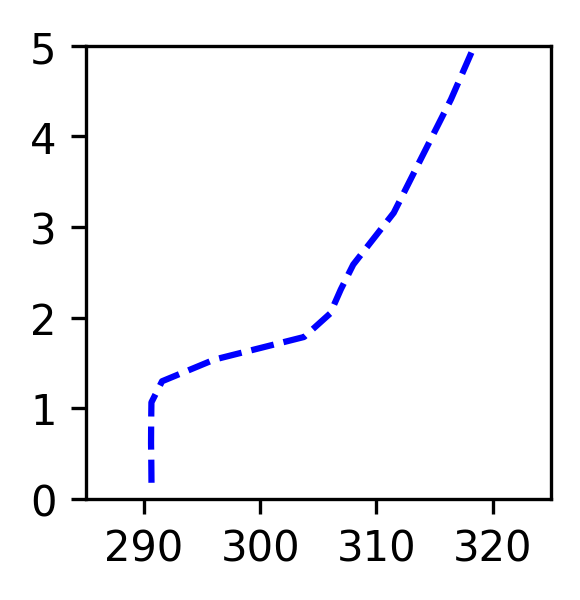

In [17]:
import numpy as np
import matplotlib.pyplot as plt

path='Machine-Learning-in-Atmospheric-Thermodynamics/hw02-2/data/'
dates=['20180114','20200109']
stns=['47918','47909','47945']

for stn in stns:
  for date in dates:
    filen=path+'/era5_'+stn+'_'+date+'.dat'
    era5=np.fromfile(filen,dtype=np.float32).reshape(5,27)



fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.plot(era5[1,:],era5[0,:]/1000.,'b--')

ax.set_ylim([0,5.])
ax.set_xlim([285.,325.])
plt.xticks(ticks=np.arange(290,321,10))
plt.xlabel('theta [K]')
plt.ylabel('height [km]')
plt.legend('Obs','ERA5')